**Case Study on Regression**
The given dataset contains price of second-hand Hyundai grand i10 car with 
respect to year of making. Find the best linear relationship between year and 
price. Can you predict the possible price of a 2022 model second-hand grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.

Import necessary python library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#import linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
#to find accuracy score
from sklearn import metrics 

In [3]:
from google.colab import files
files.upload()

Saving car_age_price.csv to car_age_price.csv


{'car_age_price.csv': b'Year,Price\r2018,465000\r2019,755000\r2019,700000\r2018,465000\r2018,465000\r2015,350000\r2016,425000\r2017,575000\r2017,509999\r2017,575000\r2019,500000\r2018,500000\r2017,500000\r2019,600000\r2017,475000\r2017,500000\r2017,500000\r2017,550000\r2019,500000\r2017,500000\r2018,500000\r2019,500000\r2015,434999\r2017,550000\r2017,550000\r2017,550000\r2017,550000\r2017,550000\r2017,550000\r2017,550000\r2019,650000\r2017,550000\r2017,550000\r2017,550000\r2017,450000\r2017,550000\r2017,550000\r2017,486000\r2018,475000\r2020,545000\r2019,525000\r2019,600000\r2018,550000\r2019,550000\r2019,550000\r2018,450000\r2019,500000\r2018,450000\r2016,396000\r2018,600000\r2013,325000\r2018,550000\r2013,345000\r2013,345000\r2017,525000\r2017,550000\r2014,341000\r2017,550000\r2014,450000\r2016,550000\r2015,490000\r2017,540000\r2017,540000\r2017,595000\r2015,490000\r2017,495000\r2017,525000\r2015,400000\r2015,465000\r2015,300000\r2015,450000\r2017,490000\r2015,300000\r2013,320000\r20

In [4]:
car_price = pd.read_csv('car_age_price.csv')
car_price.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


check how many rows and columns are present in the given dataset

In [5]:
car_price.shape

(112, 2)

basic information for the data

In [6]:
car_price.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [7]:
car_price.info

<bound method DataFrame.info of      Year   Price
0    2018  465000
1    2019  755000
2    2019  700000
3    2018  465000
4    2018  465000
..    ...     ...
107  2016  375000
108  2014  300000
109  2015  425000
110  2016  420000
111  2015  425000

[112 rows x 2 columns]>

In [8]:
car_price.columns

Index(['Year', 'Price'], dtype='object')

check for missing values in the given data.

In [9]:
car_price.isnull().sum()

Year     0
Price    0
dtype: int64

to find the max value of year

In [10]:
np.max(car_price['Year'])

2020

Covert year as age

In [11]:
car_price['Age'] = 2021 - car_price['Year']
car_price.drop('Year', axis=1, inplace=True)

In [12]:
car_price

,Price,Age
0,465000,3
1,755000,2
2,700000,2
3,465000,3
4,465000,3
...,...,...
107,375000,5
108,300000,7
109,425000,6
110,420000,5


outlier checking

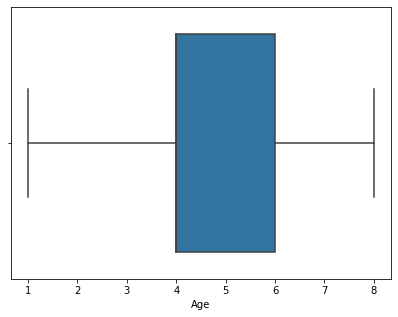

In [13]:
fig = plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.boxplot(x="Age", data=car_price)
plt.show()

co relation

In [14]:
car_price.corr()

,Price,Age
Price,1.000000,-0.776302
Age,-0.776302,1.000000


Splitt original dataset into training data and test data.

Keep the  price in y and age in x.

In [15]:
X=car_price.drop(['Price'],axis=1)
Y=car_price['Price']

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [17]:
print(X)

     Age
0      3
1      2
2      2
3      3
4      3
..   ...
107    5
108    7
109    6
110    5
111    6

[112 rows x 1 columns]


In [18]:
print(Y)

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64


MODEL TRAINING

A. Linear Regression

In [19]:
line_regr_model=LinearRegression()

In [20]:
line_regr_model.fit(X_train,Y_train)

LinearRegression()

model evaluation

Predicition on training data

In [21]:
training_data_prediction=line_regr_model.predict(X_train)

In [23]:
#R squared error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print('R squared error : ',error_score)

R squared error :  0.6161984898396344


Graphical Representation

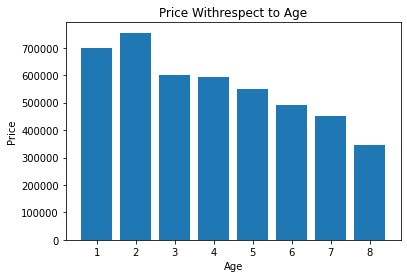

In [36]:
plt.bar(car_price.Age, car_price.Price)
plt.xlabel("Age")
plt.ylabel("Price")
plt.title("Price Withrespect to Age")
plt.show()

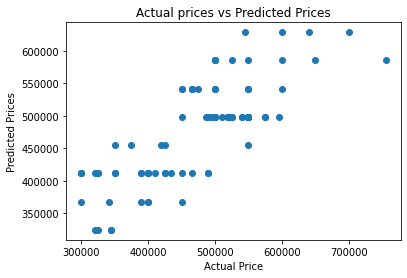

In [37]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual prices vs Predicted Prices")
plt.show()

prediction of test data

In [38]:
test_data_prediction=line_regr_model.predict(X_test)

In [39]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R squared error : ',error_score)

R squared error :  0.4168931210043416


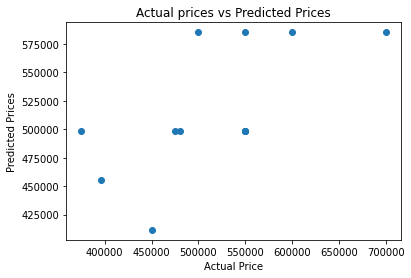

In [40]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual prices vs Predicted Prices")
plt.show()

B. Lasso Regression

In [41]:
las_regr_model=Lasso()

In [42]:
las_regr_model.fit(X_train,Y_train)

Lasso()

Model evaluation

In [44]:
training_data_prediction=las_regr_model.predict(X_train)

In [45]:
error_score=metrics.r2_score(Y_train,training_data_prediction)
print('R squared error : ',error_score)

R squared error :  0.616198489794382


Graphical representation

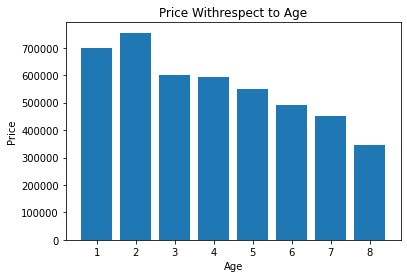

In [46]:
plt.bar(car_price.Age, car_price.Price)
plt.xlabel("Age")
plt.ylabel("Price")
plt.title("Price Withrespect to Age")
plt.show()

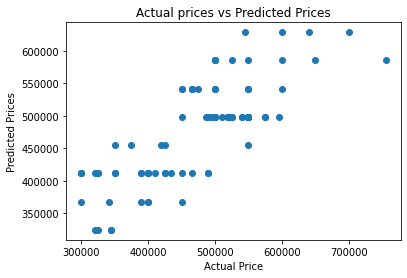

In [47]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual prices vs Predicted Prices")
plt.show()

test data 

In [48]:
test_data_prediction=las_regr_model.predict(X_test)

In [49]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R squared error : ',error_score)

R squared error :  0.4168932131334421


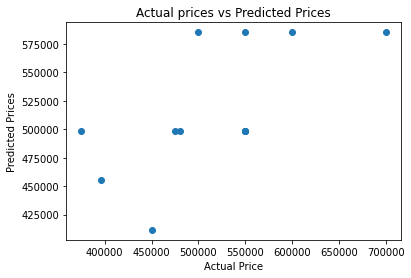

In [50]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual prices vs Predicted Prices")
plt.show()

R squared error :  0.6161984898396344